**Given function is:** \\
\begin{align}
q(x) = 1000(x_2 - x_1^2)^2 + (2 - x_1)^2
\end{align}

**1. ANSWER :** \\
**Yes, we can take a suitable diagonal matrix $\mathbf{D}^k$ for gradient descent algorithm with scaling to solve $min_x \ q(x)$.** \
Here, $\  \mathbf{D^k} =
\begin{bmatrix}
  \frac{1}{12000x_1^2 - 4000x_2 + 2 } & 0 \\ 0 & \frac{1}{2000} 
\end{bmatrix} \Rightarrow \ \mathbf{D}^k \ is \ a \ diagonal  \ matrix \ with \ the \ inverse \ second \ partial \ derivatives \ \Big(\frac{\partial^2f(\mathbf{x_k})}{(\partial x_i)^2}\Big)^{-1} \ as \ the \ diagonal \ elements.$

In [1]:
import numpy as np 

#method to find Hessian matrix
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2 
  return np.array([[12000*x[0]**2-4000*x[1]+2, -4000*x[0]], [-4000*x[0], 2000]])

#method to find the condition number of any square matrix
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  min_eigenval = min(np.linalg.eig(A)[0])
  max_eigenval = max(np.linalg.eig(A)[0])
  return max_eigenval/min_eigenval

In [2]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k_diagonal(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  #compute and return D_k
  return np.array([[1/(12000*x[0]**2-4000*x[1]+2), 0], [0, 1/2000]])

In [3]:
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return 1000*(x[1]-(x[0])**2)**2 + (2-x[0])**2

In [4]:
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([-4000*x[0]*x[1]+4000*x[0]**3+2*x[0]-4, 2000*(x[1]-x[0]**2)])

In [5]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(x) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  gr_t = np.matrix.transpose(gradf)
  #implement the backtracking line search
  while evalf(np.add(x,-alpha*gradf)) > evalf(x)-gamma*alpha*np.matmul(gr_t, gradf):
    alpha = rho*alpha
  #print('final step length:',alpha)
  return alpha

In [6]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  gr_t = np.matrix.transpose(gradf)
  #direction = -(D_k)*gradf
  #implement the backtracking line search
  while evalf(np.add(x,alpha*direction)) > evalf(x)+gamma*alpha*np.matmul(gr_t, direction):
    alpha = rho*alpha
  #print('final step length:',alpha)
  return alpha

In [7]:
#line search type 
BACKTRACKING_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH_SCALING = 2

In [8]:
#complete the code for gradient descent to find the minimizer
condition_num_list_1 = []
def find_minimizer_gd(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  x = start_x
  g_x = evalg(x) 

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here
    Hessian = evalh(x)
    cond_num1 = find_condition_number(Hessian)
    condition_num_list_1.append(cond_num1)  
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
         
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  return x , k , evalf(x)

In [9]:
#complete the code for gradient descent with scaling to find the minimizer
condition_num_list_2 = []
def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  #A = evalh(x) 
  g_x = evalg(x)
   
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH_SCALING):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k = 0
  while (np.linalg.norm(g_x) > tol):
    D_k = compute_D_k_diagonal(x)
    direction = -np.matmul(D_k, g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH_SCALING:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x, direction, alpha_start, rho, gamma)
    else:  
      raise ValueError('Line search type unknown. Please check!')
    #implement the gradient descent steps here
    Hessian = evalh(x)
    cond_num2 = find_condition_number(Hessian)
    condition_num_list_2.append(cond_num2)   
    x = np.add(x, np.multiply(step_length,direction)) #update x = x + step_length*direction
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    
  return x , k , evalf(x)  

In [10]:
my_start_x = np.array([5.0, 5.0])
my_tol= 1e-9

In [11]:
#check gradient descent with scaling and backtracking line search 

print("For BACKTRACKING_LINE_SEARCH_WITH_SCALING:")
x_opt_bls, k, f_value = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SCALING, 1.0, 0.5,0.5)
print("Minimizer = ",x_opt_bls,",Iteration = ", k , ", Minimum function value = ",f_value)

#check gradient descent without scaling and with backtracking line search 

print("\nFor BACKTRACKING_LINE_SEARCH WITHOUT SCALING :")
x_opt_bls, k, f_value = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1.0, 0.5,0.5)
print("Minimizer = ",x_opt_bls,",Iteration = ", k , ", Minimum function value = ",f_value)

For BACKTRACKING_LINE_SEARCH_WITH_SCALING:
Minimizer =  [2. 4.] ,Iteration =  764552 , Minimum function value =  1.538167124588546e-18

For BACKTRACKING_LINE_SEARCH WITHOUT SCALING :
Minimizer =  [2.         4.00000001] ,Iteration =  428277 , Minimum function value =  4.2042719010748794e-18


**Comments :** \\
Here, from the above out-put it is obvious that the number of iterations in case of Backtracking line search with scaling is larger than the number of iterations in without scaling. Which means that gradient descent algorithm with backtracking without scaling is more efficient, that is, works faster than the backtracking with scaling.   

**3. SOLUTION** \\
Here, the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the
new gradient scheme with scaling with $\mathbf{D}^k = (\nabla^2f(x^k))^{-1}$ is taken as $\mathbf{D}^{\frac{1}{2}}H(f)\mathbf{D}^{\frac{1}{2}}$, where $H(f)$ is the Hessian of the given function $f$ under consideration.  \
So, for different iterations (in particular for $k^{\text{th}}$ iteration) we have $\mathbf{Q} = \mathbf{(D^k)}^{\frac{1}{2}}H^k\mathbf{(D^k)}^{\frac{1}{2}} .$  \\
   \\
**Now, we will proceed with assuming the scaling matrix $\mathbf{D}^k$ to be non-diagonal $\Rightarrow$ $\mathbf{D}^k = (\nabla^2f(x^k))^{-1}$**  i.e. Inverse of the Hessian.

In [12]:
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  if np.linalg.det(evalh(x)) == 0:
    raise ValueError('Determinant does not exist. Please check!!')
  return np.linalg.inv(evalh(x))  #computing inverse of Hessian.

In [13]:
def compute_steplength_backtracking_scaled_direction_non_diagonal(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  #assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  D_k = compute_D_k(x)
  while evalf(x + alpha*np.matmul(D_k,-gradf)) > evalf(x) + gamma*alpha*(np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,-gradf)) ):
    alpha = rho*alpha
  return alpha  

In [14]:
EXACT_LINE_SEARCH = 3

In [15]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling_non_diagonal(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  condition_number_scaling = []
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    D_k = compute_D_k(x)
    import scipy
    from scipy.linalg import sqrtm
    d = scipy.linalg.sqrtm(D_k)
    C1 = np.matmul(np.matmul(d,evalh(x)),d)
    condition_number_scaling.append(find_condition_number(C1))
    print("Iteration", k, ", Condition Number:", find_condition_number(C1), ", x:", x)
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction_non_diagonal(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED') 
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here  
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k, condition_number_scaling
  #Complete the code   

In [22]:
my_start_x = np.array([5.0,5.0])
my_tol= 1e-9

In [23]:
#Compute gradient descent with scaling and with backtracking line search 

print("Computing Gradient descent with scaling and with Backtracking Line Search\n:")
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, k, condition_num_arr_scaling = find_minimizer_gdscaling_non_diagonal(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1.0, 0.5, 0.5)
print("\n\nMinimizer: {}, \nMinimum function value: {}".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls)),"\nNo. of Iterations:", k)

Computing Gradient descent with scaling and with Backtracking Line Search
:
Iteration 0 , Condition Number: 1.0000000000000417 , x: [5. 5.]
Iteration 1 , Condition Number: 1.0000000009519379 , x: [ 4.999925   24.99925002]
Iteration 2 , Condition Number: 1.0000000000285387 , x: [ 4.9061784  24.06179806]
Iteration 3 , Condition Number: 1.0000000000382654 , x: [ 4.82795802 23.29866599]
Iteration 4 , Condition Number: 1.0000000000109375 , x: [ 4.69956205 22.06939795]
Iteration 5 , Condition Number: 1.0000000000210825 , x: [ 4.6200955  21.33896751]
Iteration 6 , Condition Number: 1.0000000000140459 , x: [ 4.52397953 20.45399503]
Iteration 7 , Condition Number: 1.0000000000158027 , x: [ 4.4261186  19.58094907]
Iteration 8 , Condition Number: 1.0000000000126676 , x: [ 4.30573674 18.52487711]
Iteration 9 , Condition Number: 1.0000000000180675 , x: [ 4.22883677 17.87714678]
Iteration 10 , Condition Number: 1.0000000000130869 , x: [ 4.14195754 17.14530742]
Iteration 11 , Condition Number: 1.0000

**Comment:** \\
**As we can clearly see from the above out-put that in the last 3 results out of 52 iterations, we have the same minimizer. So we can confidently say that we require only 50 iterations to achieve our minimizer.**

**4. SOLUTION :** 

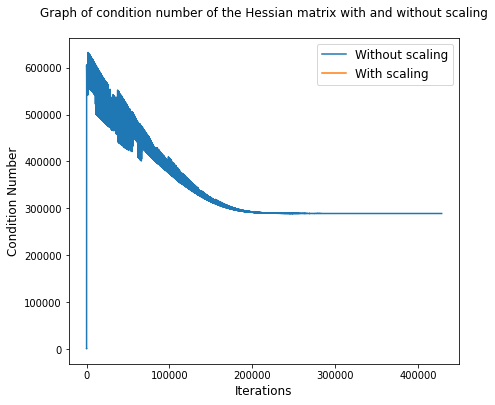

In [37]:
# plot depicting the behavior of condition numbers in both - with and without scaling backtracking against iterations. 
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(condition_num_list_1,label=r'$ $')
plt.plot(condition_num_arr_scaling,label= r'$ $') 
plt.title('Graph of condition number of the Hessian matrix with and without scaling\n',fontsize=12)
plt.xlabel(r'Iterations',fontsize=12)
plt.ylabel(r'Condition Number',fontsize=12)
plt.legend(["Without scaling", "With scaling"],fontsize=12)
plt.show()

**Here, We it is clear that the graph of conditional number with scaling is not visible in the above plot because it took only  52  iterations and it's conditional number is just near  1.0 . By the scaling of graph, we can not see it clearly. So we plotted both graphs seperately to make them more clearly visible.**

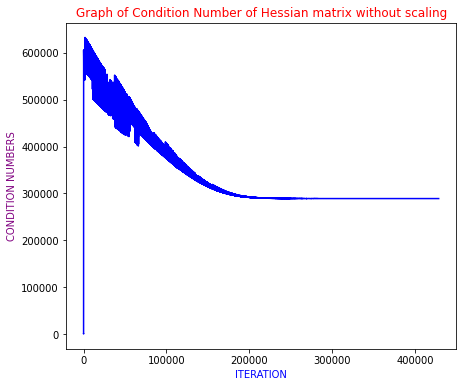

In [38]:
#plotting the condition number of the hessian matrix without scaling against the  iterations 
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.plot(condition_num_list_1,color = 'b')
plt.xlabel('ITERATION',color='b')
plt.ylabel('CONDITION NUMBERS',color='purple')
plt.title('Graph of Condition Number of Hessian matrix without scaling',color='r')
plt.show()

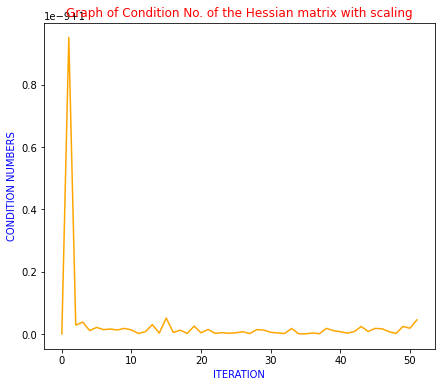

In [39]:
#plotting the condition number of the Hessian matrix with scaling against the  iterations 
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
plt.plot(condition_num_arr_scaling,color='orange')
plt.xlabel('ITERATION',color='b')
plt.ylabel('CONDITION NUMBERS',color='b')
plt.title('Graph of Condition No. of the Hessian matrix with scaling',color='r')
plt.show()

**Comment :** \\
1. From the above graph of bactracking line search with scaling, we see that the conditional number is converging to 1.0 but in the line search without scaling, the graph is reaching somewhere nearby 300000.
2. Condition number is converging for scaling method but not in the case of without scaling method.

3. Due to scaling, conditional number is converging to  1 thats why algorithm is converging quickly. This is not seen in non-scaling method. Without scaling, algorithm is taking  428277  iterations because conditional number of Hessian is Large.